# Impact of Thanksgiving in the US

In [9]:
%config InlineBackend.figure_formats = ['svg']
import datetime
import matplotlib.pyplot as plt
import oscovida as ov

ov.display_binder_link("2020-thanksgiving-us.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-thanksgiving-us.ipynb)

## Get data from Johns Hopkins University (JHU)

In [2]:
cases_jhu, deaths_jhu = ov.get_country_data("US")

Downloaded data: last data point 12/21/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Downloaded data: last data point 12/21/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv


Show the [standard OSCOVIDA plots](plots.html) together with a black line marking the 26 November 2020 (Thanksgiving in the US).

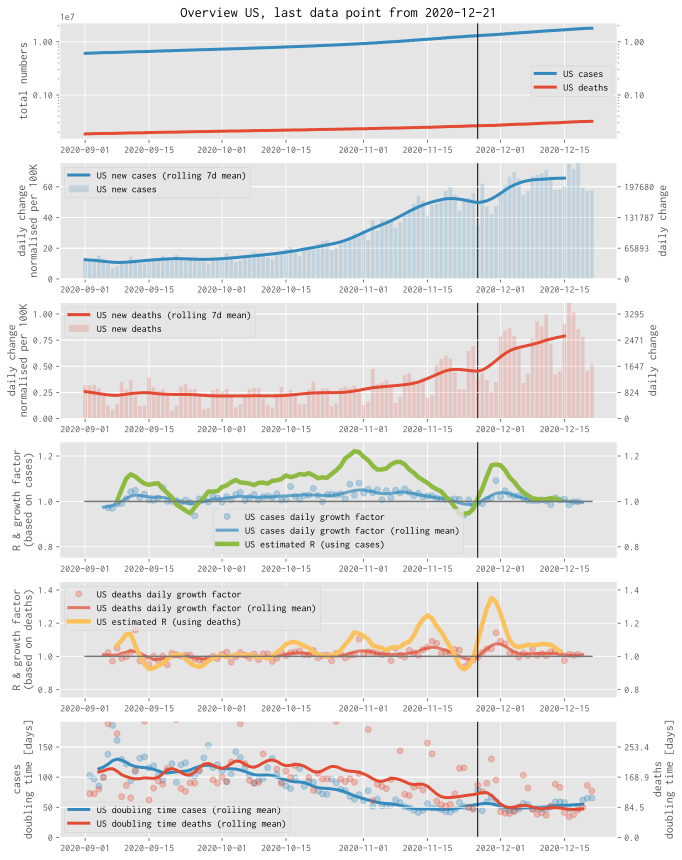

In [3]:
axes, _, _ = ov.overview(country="US", dates="2020-09-01:2020-12-31");
for ax in axes:
    ax.axvline(datetime.datetime(2020, 11, 26), color="black", linewidth=1)

### Discussion

The reported daily new infections and deaths appear to reduce a few days before Thanksgiving, and increase in the weeks after. This is well reflected in the reproduction number (green line for reproduction number for infections, and yellow line for reproduction number for deaths).

The qualitatively similar behaviour of daily deaths and daily infections suggests that one reason for the change around Thanksgiving may be the reporting behaviour: possible reasons could include that numbers have not been passed on during that festive period as quickly as normally, or some people have ignored symptoms just before Thanksgiving, and then went to tests/hospitals a few days later than they would at other times of the year.

On the other hand, if we watch the reproduction number for infections (green line) during November, then there is a downward trend from 1.2 to 1.0 just before Thanksgiving visible. It is possible that Thanksgiving has broken that downward trend. 

All in all, it seems difficult to draw firm conclusions.






### Related articles

- [BBC News, 22 December 2020](https://www.bbc.com/news/55363256) looking at selected US states
- [New York Times, 20 December 2020](https://www.nytimes.com/interactive/2020/12/20/us/covid-thanksgiving-effect.html) 

In [4]:
# axes, _, _ = ov.overview(country="US", dates="2020-11-01:2020-12-21");
# for ax in axes:
#    ax.axvline(datetime.datetime(2020, 11, 26), color="black", linewidth=1)

(737699.0, 737783.0)

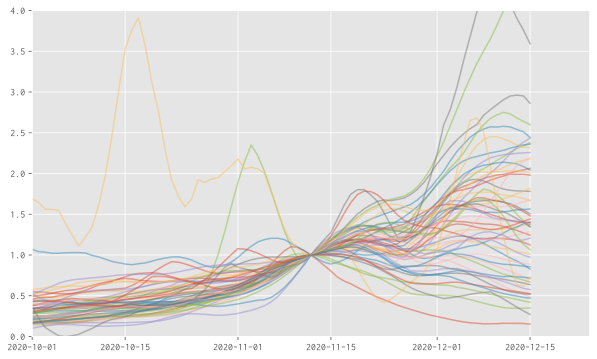

In [45]:
data = {}
us_cases = ov.fetch_cases_US()
for i, statename in enumerate(sorted(us_cases['Province_State'].drop_duplicates())):
    cases, deaths = ov.get_country_data("US", region=statename)
    _, _, daily = ov.compute_daily_change(cases)
    series, label = daily
    data[statename] = series / series["2020-11-12"]
    if i==10:
        pass #break


fig, ax = plt.subplots(figsize=(10, 6))
for state in data:
    ax.plot(data[state].index, data[state].values, label=state, alpha=0.5)
# ax.legend(loc='upper left')
ax.set_ylim(0, 4)
ax.set_xlim(datetime.datetime(2020, 10, 1), datetime.datetime(2020, 12, 24))

In [49]:
data = {}
us_cases = ov.fetch_cases_US()
for i, statename in enumerate(sorted(us_cases['Province_State'].drop_duplicates())):
    cases, deaths = ov.get_country_data("US", region=statename)
    _, _, daily = ov.compute_daily_change(cases)
    series, label = daily
    data[statename] = series   / ov.population("US", statename) # / series["2020-11-26"]
    if i==10:
        pass #break


fig, ax = plt.subplots(figsize=(10, 6))
for state in data:
    ax.plot(data[state].index, data[state].values, label=state, alpha=0.5)
# ax.legend(loc='upper left')
#ax.set_ylim(0, 4)
ax.set_xlim(datetime.datetime(2020, 10, 1), datetime.datetime(2020, 12, 24))

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'